In [1]:
using BenchmarkTools
using Plots
gr(fmt=:png)
using CUDA

In [2]:
plotjulia(j) = heatmap(j; c=:gist_earth,
    size=(540, 540), colorbar=false, ticks=false, frame=false)

plotmandelbrot(m) = heatmap(m; c=reverse(cgrad(:jet1)), 
    size=(540, 540), colorbar=false, ticks=false, frame=false)

function julia(z, c, maxiters=2^10, threshold_abs2=Inf)
    for i in Base.OneTo(maxiters)
        z = z * z + c
        abs2(z) ≥ threshold_abs2 && return i
    end
    maxiters + oneunit(maxiters)
end

mandelbrot(c, maxiters=2^10, threshold_abs2=Inf) =
    julia(zero(c), c, maxiters, threshold_abs2)

mandelbrot (generic function with 3 methods)

typeof(z) = Matrix{ComplexF64}
  0.082470 seconds (303.21 k allocations: 19.609 MiB, 72.80% compilation time)
  0.026057 seconds (4 allocations: 2.000 MiB)
typeof(j) = Matrix{Int64}


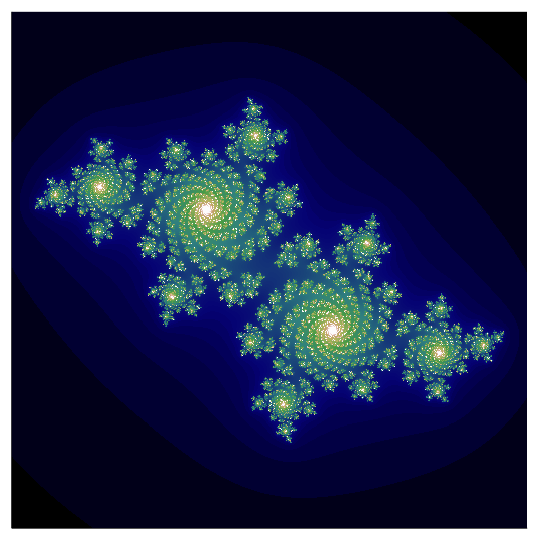

In [4]:
n = 2^9
x = range(-1.5, 1.5; length=n)
y = range(-1.5, 1.5; length=n)
z = complex.(x', y)
c = -0.380 + 0.605im

@show typeof(z)
@time j = julia.(z, c, 2^8)
@time j = julia.(z, c, 2^8)
@show typeof(j)
plotjulia(j)

typeof(z_cuda32) = CuArray{ComplexF32, 2, CUDA.Mem.DeviceBuffer}
  9.769429 seconds (20.34 M allocations: 1.166 GiB, 2.67% gc time, 0.19% compilation time)
  0.000054 seconds (30 allocations: 1.812 KiB)
typeof(j_cuda32) = CuArray{Int32, 2, CUDA.Mem.DeviceBuffer}
  0.082434 seconds (136.92 k allocations: 9.715 MiB, 27.34% gc time, 98.35% compilation time)


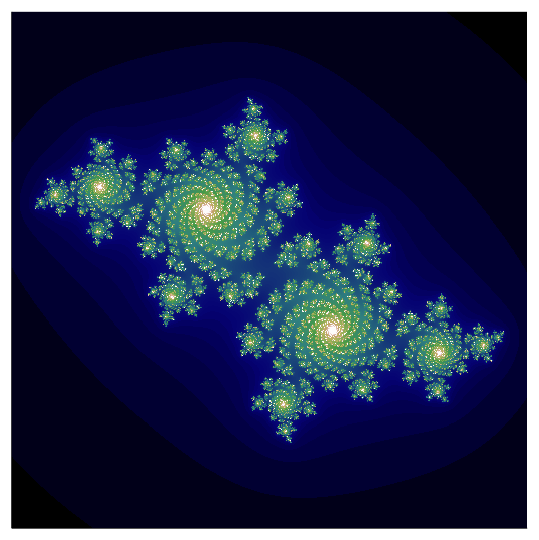

In [5]:
n = 2^9
x = range(-1.5, 1.5; length=n)
y = range(-1.5, 1.5; length=n)
z = complex.(x', y)
c = -0.380 + 0.605im

c32 = ComplexF32(c)
z_cuda32 = cu(z)

@show typeof(z_cuda32)
@time j_cuda32 = julia.(z_cuda32, c32, Int32(2^8), Inf32)
@time j_cuda32 = julia.(z_cuda32, c32, Int32(2^8), Inf32)
@show typeof(j_cuda32)
@time cj_cuda32 = collect(j_cuda32)
plotjulia(cj_cuda32)

typeof(z_cuda) = CuArray{ComplexF64, 2, CUDA.Mem.DeviceBuffer}
  0.822479 seconds (2.90 M allocations: 165.308 MiB, 2.60% gc time, 1.37% compilation time)
  0.000056 seconds (30 allocations: 1.875 KiB)
typeof(j_cuda) = CuArray{Int64, 2, CUDA.Mem.DeviceBuffer}
  0.082615 seconds (124.17 k allocations: 10.905 MiB, 69.74% compilation time)


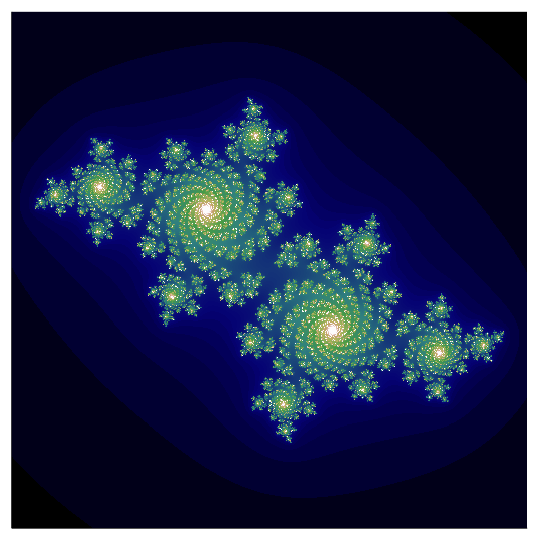

In [6]:
n = 2^9
x = range(-1.5, 1.5; length=n)
y = range(-1.5, 1.5; length=n)
z = complex.(x', y)
c = -0.380 + 0.605im

z_cuda = CuMatrix{ComplexF64}(z)

@show typeof(z_cuda)
@time j_cuda = julia.(z_cuda, c, 2^8)
@time j_cuda = julia.(z_cuda, c, 2^8)
@show typeof(j_cuda)
@time cj_cuda = collect(j_cuda)
plotjulia(cj_cuda)

typeof(c) = Matrix{ComplexF64}
  0.081834 seconds (233.34 k allocations: 15.253 MiB, 68.48% compilation time)
  0.024948 seconds (4 allocations: 2.000 MiB)
typeof(m) = Matrix{Int64}


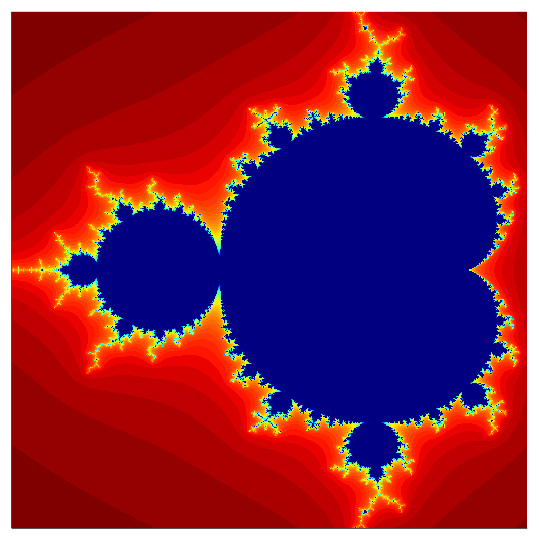

In [7]:
n = 2^9
x = range(-1.6, 0.5; length=n)
y = range(-1.1, 1.1; length=n)
c = complex.(x', y)

@show typeof(c)
@time m = mandelbrot.(c, 2^6)
@time m = mandelbrot.(c, 2^6)
@show typeof(m)
plotmandelbrot(m)

typeof(c_cuda) = CuArray{ComplexF64, 2, CUDA.Mem.DeviceBuffer}
  0.725622 seconds (2.64 M allocations: 150.398 MiB, 3.84% gc time, 1.28% compilation time)
  0.000095 seconds (30 allocations: 1.750 KiB)
typeof(m_cuda) = CuArray{Int64, 2, CUDA.Mem.DeviceBuffer}
  0.007123 seconds (5 allocations: 4.000 MiB)
typeof(cm_cuda) = Matrix{Int64}


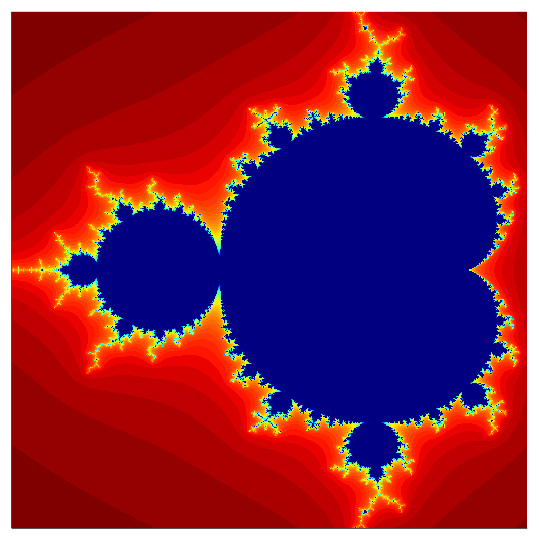

In [8]:
n = 2^9
x = range(-1.6, 0.5; length=n)
y = range(-1.1, 1.1; length=n)
c = complex.(x', y)
c_cuda = CuMatrix{ComplexF64}(c)

@show typeof(c_cuda)
@time m_cuda = mandelbrot.(c_cuda, 2^6)
@time m_cuda = mandelbrot.(c_cuda, 2^6)
@show typeof(m_cuda)
@time cm_cuda = collect(m_cuda)
@show typeof(cm_cuda)
plotmandelbrot(cm_cuda)

typeof(c) = Matrix{ComplexF64}
  0.824064 seconds (5 allocations: 2.000 MiB)
  0.815627 seconds (5 allocations: 2.000 MiB)
typeof(m) = Matrix{Int64}


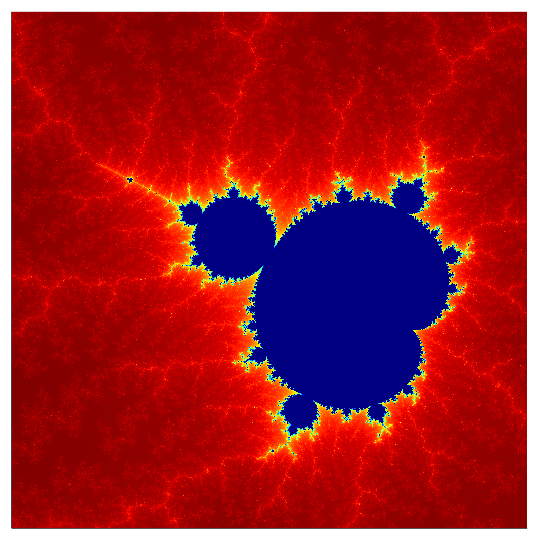

In [9]:
n = 2^9
x = range(-0.714689, -0.714679; length=n)
y = range( 0.299872,  0.299882; length=n)
c = complex.(x', y)

@show typeof(c)
@time m = mandelbrot.(c, 2^12)
@time m = mandelbrot.(c, 2^12)
@show typeof(m)
plotmandelbrot(m)

typeof(c_cuda) = CuArray{ComplexF64, 2, CUDA.Mem.DeviceBuffer}
  0.000060 seconds (31 allocations: 1.766 KiB)
  0.000072 seconds (31 allocations: 1.766 KiB)
typeof(m_cuda) = CuArray{Int64, 2, CUDA.Mem.DeviceBuffer}
  0.224729 seconds (122 allocations: 4.010 MiB, 4.58% gc time)
typeof(cm_cuda) = Matrix{Int64}


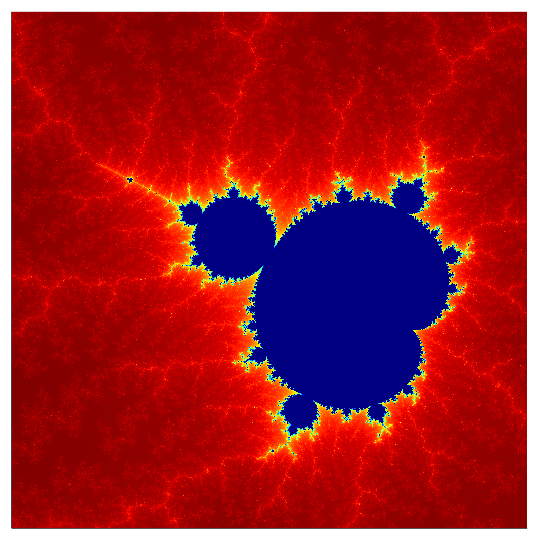

In [10]:
n = 2^9
x = range(-0.714689, -0.714679; length=n)
y = range( 0.299872,  0.299882; length=n)
c = complex.(x', y)
c_cuda = CuMatrix{ComplexF64}(c)

@show typeof(c_cuda)
@time m_cuda = mandelbrot.(c_cuda, 2^12)
@time m_cuda = mandelbrot.(c_cuda, 2^12)
@show typeof(m_cuda)
@time cm_cuda = collect(m_cuda)
@show typeof(cm_cuda)
plotmandelbrot(cm_cuda)